In [8]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
y = X.loc[:, 'total_demand'].copy()
X = X.drop(['total_demand'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

In [3]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [4]:
model = LGBMRegressor(num_leaves=45)
model.fit(X_train, y_train)

# Make predictions
testPredict = model.predict(X_test)
trainPredict = model.predict(X_train)

In [5]:
training_mae = mean_absolute_error(y_train, trainPredict)
test_mae = mean_absolute_error(y_test, testPredict)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

training_mape = mean_absolute_percentage_error(y_train, trainPredict)
test_mape = mean_absolute_percentage_error(y_test, testPredict)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 4) *100} %")

Training MAE: 19.27
Test MAE: 42.75


Training MAPE: 9.520000000000001 %
Test MAPE: 23.61 %


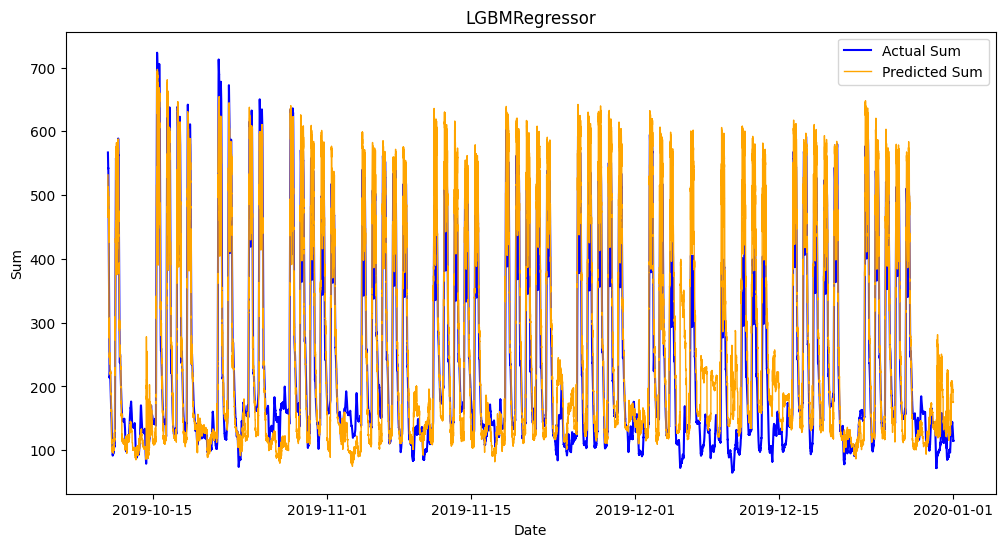

In [13]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, color='blue', label='Actual Sum')
plt.plot(X_test.index, testPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('LGBMRegressor')
plt.legend()
plt.show()

In [12]:
y.mean()

251.18902791051607